<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB 리뷰 데이터 준비

In [6]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300) #가장 자주 사용되는 300개의 단어 사용

In [8]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [9]:
print(len(train_input[0])) #첫 번째 리뷰의 길이

218


In [10]:
print(len(train_input[1])) #두 번째 리뷰의 길이

189


In [11]:
print(train_input[0]) #첫 번째 리뷰의 내용

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다.

In [12]:
print(train_target[:20]) #타깃 데이터 출력

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


리뷰가 긍정(1)인지 부정(0)인지 나뉨.

In [13]:
#훈련 세트에서 검증 세트를 분리
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [14]:
#각 리뷰의 길이를 계산해 넘파이 배열에 담는다.
#평균적인 리뷰의 길이와 가장 길고 짧은 리뷰의 길이를 확인하려고
import numpy as np
lengths = np.array([len(x) for x in train_input])


In [15]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개, 중간값은 178

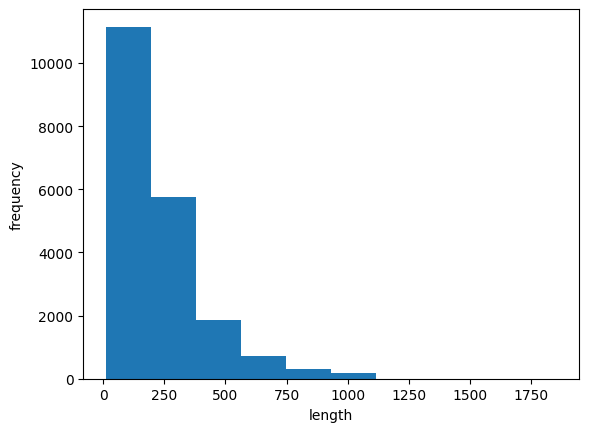

In [16]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [19]:
#train_input의 길이를 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩

In [20]:
print(train_seq.shape)

(20000, 100)


In [21]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


위 샘플의 앞뒤에 패딩값 0이 없는 것으로 보아 100보다는 길었을 것 같다.

In [23]:
print(train_input[0][-10:]) #원본 샘플의 끝을 확인

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


동일한 것으로 보아 앞부분이 잘린 것을 확인할 수 있다. <br>
pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자른다. <br>
뒷부분을 자르고 싶으면 truncating 매개변수의 값을 post로 바꾸면 된다.

In [24]:
print(train_seq[5]) #6번째 샘플을 출력

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞 부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안되겠다. <br>
같은 이유로 패딩 토큰은 앞부분에 추가된다. <br>
뒷 부분에 추가하고 싶으면 padding 매개변수를 post로 바꾸면 된다.

In [25]:
val_seq = pad_sequences(val_input, maxlen=100) #검증 세트의 길이도 100으로 맞춤

**순환 신경망 만들기**

In [26]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300))) #8개의 뉴런, 입력 차원은 (100, 300)->100은 샘플의 길이, 300은 원-핫 인코딩을 사용하기 위한 값으로, 훈련 데이터에 포함될 수 있는 정수 값의 범위는 0~299(처음에 300개의 단어만 사용하도록 지정해서) 활성화 함수는 기본값인 tanh
model.add(keras.layers.Dense(1, activation='sigmoid'))

위처럼 수동으로 배열을 만들 필요 x, 원-핫 인코딩을 위한 유틸리티를 제공함.

In [27]:
train_oh = keras.utils.to_categorical(train_seq)

In [28]:
print(train_oh.shape)

(20000, 100, 300)


정수 하나마다 모두 300차원읜 배열로 변경되어서 (2000, 100) 크기의 train_seq가 (2000, 100, 300) 크기의 train_oh로 생성됨.

In [29]:
print(train_oh[0][0][:12]) #첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩 되었는지

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [30]:
val_oh = keras.utils.to_categorical(val_seq) #검증 세트도 변경

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이 순환층은 마지막 타임스텝의 은닉 상태만 출력하기 때문에, 출력 크기가 뉴런의 개수인 8과 동일하다. <br>
입력 토큰은 300차원의 원-핫 인코딩 배열이다. 이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문에, 총 300*8=2400개의 가중치가 있다. <br>
순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해진다. <br>
이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 대문에, 8(은닉 상태 크기) * 8(뉴런의 개수) = 64개의 가중치가 필요하다. <br>
마지막으로 뉴런마다 하나의 절편이 있다. 그래서 총 2400 + 64 + 8 = 2472개의 모델 파라미터가 필요하다.

In [32]:
#훈련하기

#기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 생성해 학습률을 0.0001로 지정
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 52ms/step - loss: 0.6969 - accuracy: 0.5120 - val_loss: 0.6945 - val_accuracy: 0.5140
Epoch 2/100
  3/313 [..............................] - ETA: 11s - loss: 0.7129 - accuracy: 0.4479

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 24s 75ms/step - loss: 0.6906 - accuracy: 0.5253 - val_loss: 0.6897 - val_accuracy: 0.5240
Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6832 - accuracy: 0.5563 - val_loss: 0.6808 - val_accuracy: 0.5670
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6654 - accuracy: 0.6002 - val_loss: 0.6639 - val_accuracy: 0.6054
Epoch 5/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6469 - accuracy: 0.6330 - val_loss: 0.6501 - val_accuracy: 0.6250
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6319 - accuracy: 0.6538 - val_loss: 0.6401 - val_accuracy: 0.6378
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6191 - accuracy: 0.6709 - val_loss: 0.6239 - val_accuracy: 0.6620
Epoch 8/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6074 - accuracy: 0.6829 - val_loss: 0.6138 - val_accuracy: 0.66

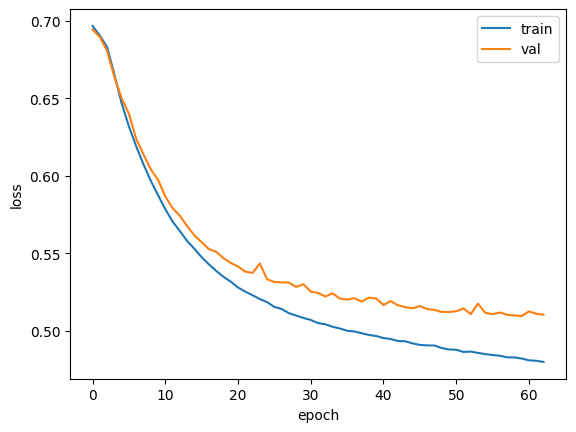

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 감소하고 있지만, 검증 손실은 대략 63번째 에포크에서 감소가 둔해지고 있다.

원-핫 인코딩으로 변환했기 때문에, 입력 데이터가 엄청 커진다.

In [34]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


토큰 1개를 300차원으로 늘려서, 대략 300배가 커진다.

**단어 임베딩 사용하기**

In [35]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100)) #SimpleRNN 층 앞에 Embedding 클래스를 추가, 300은 어휘 사전의 크기, 16은 임베딩 벡터의 크기, 100은 입력 시퀀스의 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


임베딩 층은 (100, ) 크기의 입력을 받아 (100, 16) 크기의 출력을 만든다. <br>
Embedding 클래스는 300개의 각 토큰을 크기가 16인 벡터로  만들기 때문에, 총 300 * 16 = 4800개의 모델 파라미터를 가진다. <br>
SimpleRNN 층은 임베딩 벡터의 크기가 16이므로, 8개의 뉴런과 곱하기 위해 필요한 가중치 16 * 8 = 128개를 가진다. 그리고 은닉 상태에 곱해지는 가중치 8 * 8 = 64개가 있다. 그리고 8개의 절편이 있으므로 128 + 64 + 8 = 200개의 전체 모델 파라미터를 가진다. <br>
마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개이다.

In [38]:
#훈련하기

#기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 생성해 학습률을 0.0001로 지정
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 27ms/step - loss: 0.6971 - accuracy: 0.4994 - val_loss: 0.6930 - val_accuracy: 0.5202
Epoch 2/100
  4/313 [..............................] - ETA: 7s - loss: 0.6818 - accuracy: 0.5820

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 29ms/step - loss: 0.6918 - accuracy: 0.5207 - val_loss: 0.6904 - val_accuracy: 0.5298
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6882 - accuracy: 0.5387 - val_loss: 0.6879 - val_accuracy: 0.5420
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6849 - accuracy: 0.5600 - val_loss: 0.6857 - val_accuracy: 0.5554
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6814 - accuracy: 0.5694 - val_loss: 0.6834 - val_accuracy: 0.5592
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6779 - accuracy: 0.5764 - val_loss: 0.6810 - val_accuracy: 0.5618
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6744 - accuracy: 0.5863 - val_loss: 0.6789 - val_accuracy: 0.5652
Epoch 8/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6710 - accuracy: 0.5886 - val_loss: 0.6770 - val_accuracy: 0.5702
Epoc

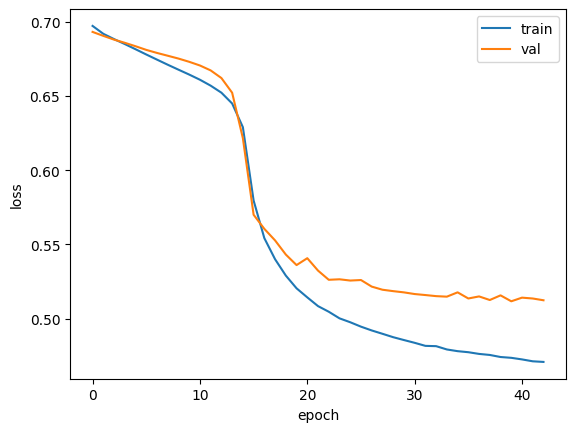

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()